## PyTorch Tensors
##### 텐서 조작에 대해서 알아보자

In [1]:
import torch

In [3]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [6]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [7]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [8]:
# shape이 다르기 때문에 + 연산에서 런타임 오류가 발생한다.
r1 = torch.rand(2,3)
r2 = torch.rand(3,2)
r3 = r1 + r2

RuntimeError: ignored

In [9]:
r = (torch.rand(2,2) - 0.5) * 2
print(r)

# 절대값
print(torch.abs(r))

# 역사인 함수
print(torch.asin(r))

# 행렬식
print(torch.det(r))

# 특이값 분해
print(torch.svd(r))

# 평균 및 표준편차
print(torch.std_mean(r))

print(torch.max(r))

tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])
tensor(-0.5703)
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))
(tensor(0.7217), tensor(0.1247))
tensor(0.9956)


## PyTorch Models

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

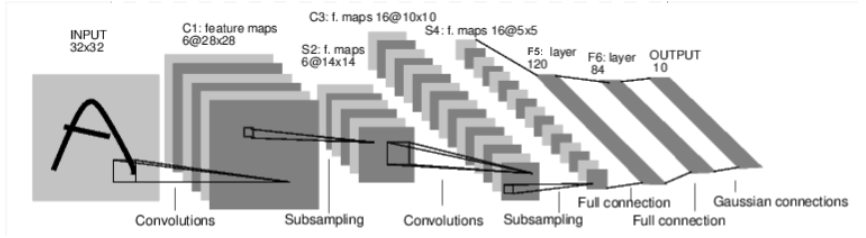

##### LeNet-5는 초기 합성곱 신경망 중 하나이자 딥 러닝의 폭발적인 인기 요인 중 하나였다.
##### LeNet-5의 간단한 동작에 대해서 설명하면 아래와 같다.
* 계층 C1은 합성곱 계층입니다. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색합니다. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵을 보여줍니다. 이 “활성화 맵” 으로 S2 계층에서 다운샘플링됩니다.

* 계층 C3는 다른 합성곱 계층으로, 이 시점은 특징들의 조합 을 위해 C1 활성화 맵 검색합니다. 또한, 계층 S4에서 다운샘플링된 이러한 특징 조합의 spatial locations을 제공합니다.

* 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, OUTPUT은 최종 활성화 맵을 가져와 십진수를 표현하는 10개의 bin 중 하나로 분류 하는 분류기입니다.

In [11]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # 실제 계산이 수행되는 부분
  def forward(self, x):
    # 최대 풀링은 (2, 2) 윈도우 크기를 사용합니다.
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있습니다.
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
      size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

In [12]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print(input.shape)

output = net(input)
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
torch.Size([1, 1, 32, 32])
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


##### LeNet 클래스를 인스턴스화하고 net 객체를 출력한다.
##### 1 채널과 32x32 이미지크기를 가진 더미 입력을 생성한다. 일반적으로 배치 이미지를 읽어들이고, 이미지와 같은 크기의 텐서로 변환한다.
##### 모델을 함수처럼 net(input) 를 호출하여 추론을 요청한다. output 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있다. 만약 16개의 인스턴스로 구성된 입력으로 모델을 통과했다면 output은 (16, 10)의 형태를 가질 것이다.

## Datasets 및 Dataloaders
##### Torchvision 에서 오픈 데이터셋을 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습한다.
##### 먼저 들어오는 이미지를 Pytorch tensor로 변환한다.

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

##### 여기서 입력에 대한 두 가지 변환을 지정한다.
* 'transforms.ToTensor()'는 Pillow 패키지를 사용하여 불러온 이미지를 PyTorch tnesor 형태로 변환
* transforms.Normalize()는 tensor의 평균이 0이고 표준 편차가 0.5가 되도록 tensor의 값을 조정한다.

##### CIFAR10 데이터셋의 인스턴스를 생성한다.
##### 생성할 때, 몇 가지 파라미터를 선언해야한다.
* 데이터를 저장할려는 파일 시스템 경로
* 데이터셋을 학습에 사용하는 지 여부
* 데이터셋을 다운로드 할 지 여부
* 데이터에 적용할려는 변환 객체

In [14]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:11<00:00, 14389465.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


##### 데이터셋 다운로드가 끝나면 'DataLoader'에 사용할 수 있다.

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

##### Dataset 하위 클래스는 데이터 접근에 대한 클래스를 포함한다. DataLoader는 데이터에 대해 아무것도 알지 못하지만 Dataset이 제공하는 입력 tensor를 사용자가 지정한 파라미터로 구성한다.
##### 아래 예제니는 무작위로 4개의 batch 이미지를 trainset에서 추출하고 disk 에서 데이터를 로드하기 위해 2개의 workers를 spin up 했다

 ship   car horse  ship


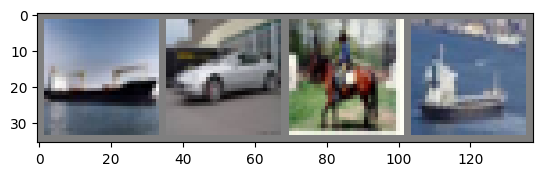

In [16]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## PyTorch 모델 학습
##### 학습 및 테스트 데이터셋이 필요하다. 데이터셋을 다운로드 받고, 확인해보자

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat   cat  deer  frog


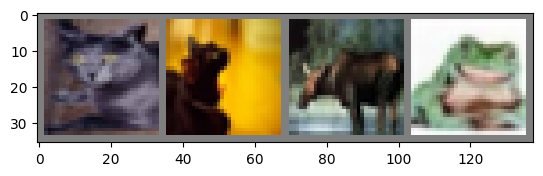

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수입니다.


def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

##### 데이터셋의 문제가 없는 것을 확인하고, 모델을 학습시켜 보자.

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

##### 마지막으로 학습에 필요한 손실 함수 및 최적화 방법이다.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##### 손실 함수는 모델이 예측한 정답 값이 얼마나 차이가 나는지 표현하는 지표이다.
##### optimizer는 학습의 필수요소이다.

##### 모든 것이 학습 loop를 진행한다.

In [22]:
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받습니다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정합니다 : 모든 batch에 대해서 기울기를 초기화하지 않으면 누적되어 잘못된 기울기 값이 제공된다.
        optimizer.zero_grad()

        # forward + backward + optimize
        # 모델 예측 수행
        outputs = net(inputs)
        # loss 값 계산
        loss = criterion(outputs, labels)
        # 모델의 학습 기울기 계산
        loss.backward()
        # 학습 단계 최적화 수행 -> 학습 가중치 조정
        optimizer.step()

        # epoch 및 loss 값을 출력합니다
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력합니다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.876
[1,  6000] loss: 1.654
[1,  8000] loss: 1.576
[1, 10000] loss: 1.517
[1, 12000] loss: 1.463
[2,  2000] loss: 1.416
[2,  4000] loss: 1.376
[2,  6000] loss: 1.338
[2,  8000] loss: 1.331
[2, 10000] loss: 1.317
[2, 12000] loss: 1.273
Finished Training


##### 모델의 과적합을 방지하고 일반화 학습을 잘 수행하고 있는지 테스트를 진행해보자

In [23]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%' % (
    100 * correct / total))

10000개 테스트 이미지에서 모델 정확도: 55 %
